In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [3]:
movie_file = pd.read_csv('Movies.csv', encoding='latin1')

In [4]:
movie_file

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
movie_file.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
movie_file.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
movie_file.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
movie_file.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
movie_file.isnull().sum().sum()

33523

In [10]:
movie_file.shape

(15509, 10)

In [11]:
movie_file.dropna(inplace = True)

In [12]:
movie_file.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [13]:
movie_file.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
movie_file.isnull().sum().sum()

0

In [15]:
movie_file.shape

(5659, 10)

In [16]:
movie_file['Duration'] = movie_file['Duration'].str.extract('(\d+)')
movie_file['Duration'] = pd.to_numeric(movie_file['Duration'], errors='coerce')

In [17]:
movie_file["Year"].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [18]:
genre = movie_file['Genre']

In [19]:
genre.head(11)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
Name: Genre, dtype: object

In [20]:
genres = movie_file['Genre'].str.split(', ', expand=True)

In [21]:
genres.head(11)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [22]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [23]:
genresPie = movie_file['Genre'].value_counts()

In [24]:
genresPie.head(11)

Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Action, Comedy, Drama     118
Name: Genre, dtype: int64

In [25]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [26]:
genrePie.head(11)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [27]:
movie_file['Votes'] = movie_file['Votes'].str.replace(',', '').astype(int)

In [28]:
movie_file['Votes'].head(11)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
15    6619
Name: Votes, dtype: int32

In [29]:
movie_file["Director"].nunique()

2431

In [30]:
directors = movie_file["Director"].value_counts()

In [31]:
directors.head(11)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
Name: Director, dtype: int64

In [5]:
import pandas as pd

# Example of manually creating the DataFrame
data = {
    'Actor 1': ['Actor A', 'Actor B', 'Actor C'],
    'Actor 2': ['Actor D', 'Actor E', 'Actor F'],
    'Actor 3': ['Actor G', 'Actor H', 'Actor I']
}
movie_file = pd.DataFrame(data)

# Now you can use 'movie_file' as a DataFrame
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']]).dropna().value_counts()


In [6]:
actors.head(11)

Actor A    1
Actor B    1
Actor C    1
Actor D    1
Actor E    1
Actor F    1
Actor G    1
Actor H    1
Actor I    1
dtype: int64

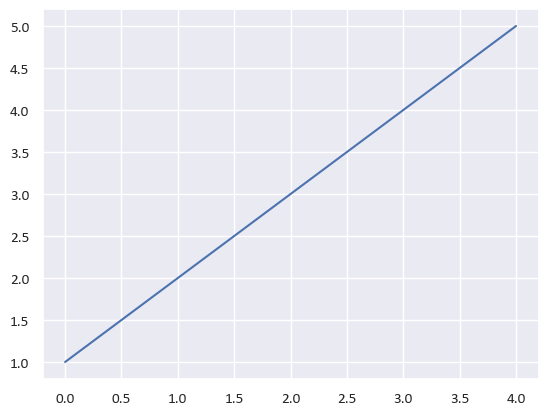

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and font for Seaborn plots
sns.set(style="darkgrid", font="Calibri")

# Example plot to verify the style and font settings
data = [1, 2, 3, 4, 5]
sns.lineplot(data=data)

# Show the plot
plt.show()


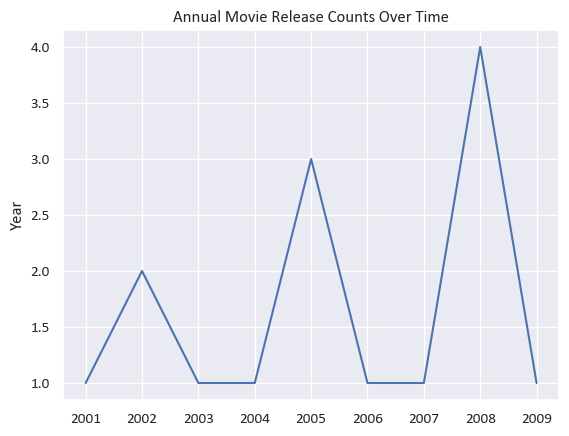

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation, replace this with your actual movie_file DataFrame
data = {
    'Year': [2001, 2002, 2002, 2003, 2004, 2005, 2005, 2005, 2006, 2007, 2008, 2008, 2008, 2008, 2009]
}
movie_file = pd.DataFrame(data)

# Plotting the data
ax = sns.lineplot(data=movie_file['Year'].value_counts().sort_index())
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")

# Show the plot
plt.show()


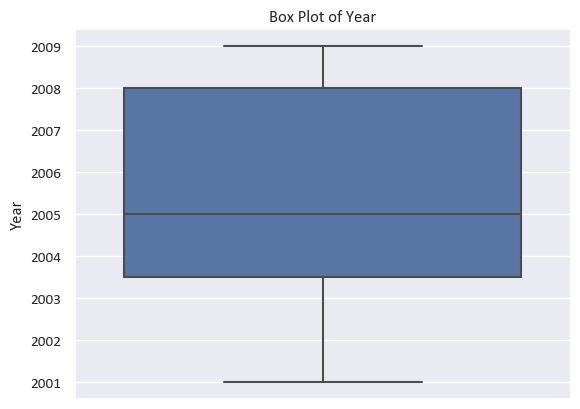

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation, replace this with your actual movie_file DataFrame
data = {
    'Year': [2001, 2002, 2002, 2003, 2004, 2005, 2005, 2005, 2006, 2007, 2008, 2008, 2008, 2008, 2009]
}
movie_file = pd.DataFrame(data)

# Create a box plot
ax = sns.boxplot(data=movie_file, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')

# Show the plot
plt.show()


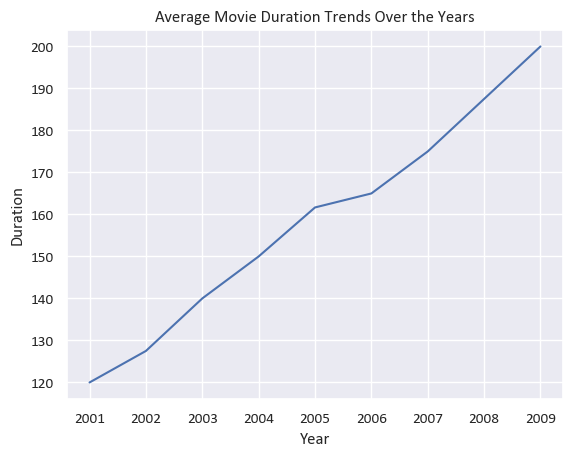

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation, replace this with your actual movie_file DataFrame
data = {
    'Year': [2001, 2002, 2002, 2003, 2004, 2005, 2005, 2005, 2006, 2007, 2008, 2008, 2008, 2008, 2009],
    'Duration': [120, 130, 125, 140, 150, 160, 155, 170, 165, 175, 180, 185, 190, 195, 200]
}
movie_file = pd.DataFrame(data)

# Create a line plot
ax = sns.lineplot(data=movie_file.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
ax.set_title("Average Movie Duration Trends Over the Years")

# Show the plot
plt.show()


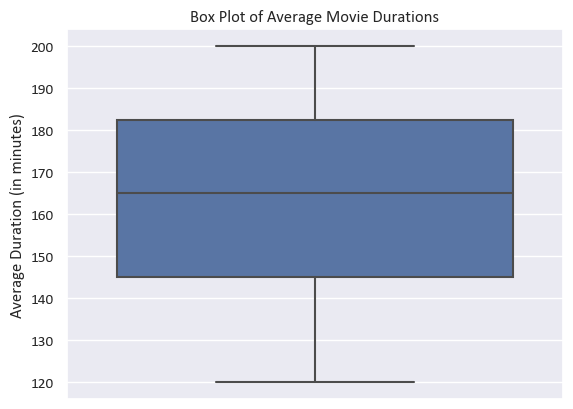

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation, replace this with your actual movie_file DataFrame
data = {
    'Year': [2001, 2002, 2002, 2003, 2004, 2005, 2005, 2005, 2006, 2007, 2008, 2008, 2008, 2008, 2009],
    'Duration': [120, 130, 125, 140, 150, 160, 155, 170, 165, 175, 180, 185, 190, 195, 200]
}
movie_file = pd.DataFrame(data)

# Create a box plot
ax = sns.boxplot(data=movie_file, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration (in minutes)')

# Show the plot
plt.show()


In [19]:
Q1 = movie_file['Duration'].quantile(0.25)
Q3 = movie_file['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = movie_file[(movie_file['Duration'] >= lower_bound) & (movie_file['Duration'] <= upper_bound)]
df.head(11)

,Year,Duration
0,2001,120
1,2002,130
2,2002,125
3,2003,140
4,2004,150
5,2005,160
6,2005,155
7,2005,170
8,2006,165
9,2007,175


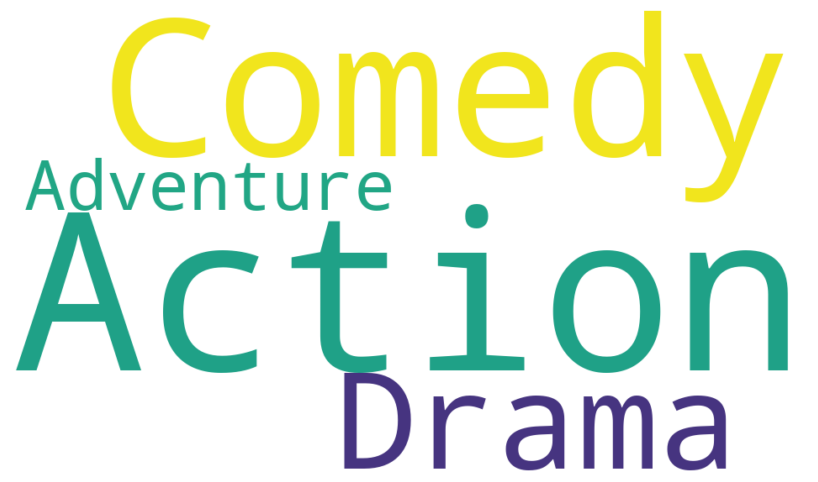

In [28]:
from wordcloud import WordCloud  # Import WordCloud class from the wordcloud library
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt for plotting

# Assuming genre_counts is already calculated as in your code
genre_counts = movie_file['Genre'].str.split(', ', expand=True).stack().value_counts()

# Generate the WordCloud object from genre_counts
wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

# Plot the WordCloud
plt.figure(figsize=(16, 6))  # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')  # Show the WordCloud
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot

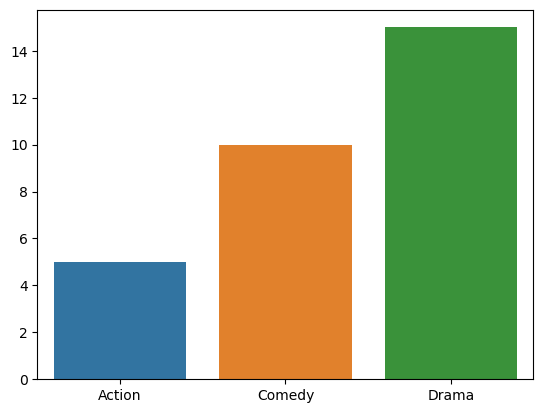

In [4]:
# Assuming you have a dictionary named genreCounts defined earlier
genreCounts = {
    'Action': 10,
    'Comedy': 15,
    'Drama': 5,
    # Add other genres and their counts here
}

# Sorting the labels and counts
genreLabels = sorted(genreCounts.keys())
genreCounts = sorted(genreCounts.values())

# Plotting the bar chart
import seaborn as sb
import matplotlib.pyplot as plt

ax = sb.barplot(x=genreLabels, y=genreCounts)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/movie_file.csv'